<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px">
# Classification Evaluation Lab
Week 4 | Lab 1.4
***

The goal of our first classifcation evaluation lab is to understand working with the common tools and methods we use when we evaluate prediction in terms of classification.  Also, we will explore the possibility of engineering features with continious variables, that can be used for classifcation.

In [1]:
import pandas as pd, numpy as np

%matplotlib inline

## Load the "Sacramento Realestate Transactions" housing dataset

In [28]:
df = pd.read_csv("../../../datasets/sacramento_real_estate/Sacramentorealestatetransactions.csv")

### 1. Create a binary variable where 1 indicates a house sold for over 200,000 and 0 indicates a house sold for equal to or less than 200,000.

In [29]:
df['over_200000'] = df.apply(lambda x: 1 if x['price'] > 200000 else 0, axis=1)
df['over_200000'].value_counts()

1    538
0    447
Name: over_200000, dtype: int64

In [30]:
df.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,over_200000
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620,1
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890,1
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803,1
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424,1
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915,1


### 2. Subset the data to just contain the number of beds, baths, the sq ft, and the over 200k indicator / response variable.

Use patsy for this please!

In [15]:
import patsy

formula = 'over_200000 ~ beds + baths + sq__ft - 1'

y, X = patsy.dmatrices(formula, data=df, return_type='dataframe')

### 3. Load your design matrix.  Split your data into training and testing sets.  Setup KNN.

The predictors are the beds, baths, and sq ft. The feature is the over 200k class variable you just created. Make the test size 33% (and optionally stratify).

> _Research the stratify parameter.  Why could this be important?_

In [21]:
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), train_size=0.33)

print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(325, 3) (325,)
(660, 3) (660,)


In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import grid_search

knn = KNeighborsClassifier()

search_parameters = {
    'n_neighbors':  range(1,10,2), 
    'weights':      ("uniform", "distance"),
    'algorithm':    ("ball_tree", "kd_tree", "brute", "auto")
}

clf = grid_search.GridSearchCV(knn, search_parameters, cv=5, verbose=1, n_jobs=-1)

clf.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9], 'weights': ('uniform', 'distance'), 'algorithm': ('ball_tree', 'kd_tree', 'brute', 'auto')},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [18]:
print "Best Estimator:", clf.best_estimator_.n_neighbors
print "Best Params:", clf.best_params_
print "Best Score:", clf.best_score_

Best Estimator: 7
Best Params: {'n_neighbors': 7, 'weights': 'uniform', 'algorithm': 'ball_tree'}
Best Score: 0.686153846154


In [19]:
y_pred = clf.predict(X_test)
print y_pred[0:5]

[ 0.  1.  0.  0.  1.]


### 4. Print out the confusion matrix
What do these mean?

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)

confusion = pd.DataFrame(confmat, index=['is_over_200k', 'is_not_over_200k'],
                         columns=['predicted_is_over_200k','predicted_is_not_over_200k'])

print(confusion)

                  predicted_is_over_200k  predicted_is_not_over_200k
is_over_200k                         203                          99
is_not_over_200k                      75                         283


### 5. Change the response threshold (price) for your target.

Currently, you should be encoding a binary price variable based on prices > 200.  How does adjusting that threashold affect the false positive rate of your prediction?  Print out your confusion matrix.

### 6. Plot your confusion matrix metrics through a range of K from 1-10.
Iterate through a list of numbers containing a range of N from 1-10.  Plot your false positive rate.

> **Optionally** Plot the scores from the rest of the confusion matrix and plot their values, _true_positives, false_negatives, false_positives, true_negatives_, over this range for **K** (n_neighbors).

How do they change?  Why do they change?

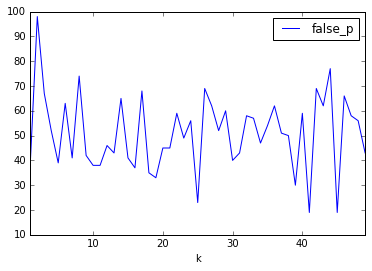

In [38]:
scores = []

for k in range(1, 50):
    y, X = patsy.dmatrices("over_200000 ~ beds + baths + sq__ft - 1", data=df, return_type="dataframe")

    X_train, X_test, y_train, y_test = train_test_split(X, np.ravel(y), test_size=.33)

    knn       =   KNeighborsClassifier(n_neighbors = k)
    model     =   knn.fit(X_train, y_train)

    predicted =   knn.predict(X_test)
    knn_score =   knn.score(X_test, y_test)

    tp, fn, fp, tn = np.ravel(confusion_matrix(y_test, predicted))

    scores.append({
        "true_p":   tp,
        "false_n":  fn,
        "false_p":  fp,
        "true_n":   tn,
        "model_score": knn_score,
        "k":        k
    })

scores_df = pd.DataFrame(scores)
scores_df.index = scores_df['k']
scores_df.plot(kind='line', x='k', y='false_p')

### 7.  Can you think on any reasons changing this threashold is bad / good?

Find someone you've not talked with much in class then discuss this with them.  Seriously, get out and talk to someone you haven't talked with much.

In [ ]:
# [change this cell to markdown type and write some notes here]

### 8. If you were a real-estate agent, and you wanted to minimize false positives, because you would lose money, what would you be trading off in terms of business value?

Discuss this with a few others as well and come up with at least 2 ideas that are actionable and optionally explore one of them through further analysis.

### Challenge #1:  Gridsearch + plot for an optimal value for K with KNN
Plot the value of K from Gridsearch params scored over the range to find an optimal value for K, for score.

> **Optionally**, can you find a configuration that minimizes false positives?  What is the tradeoff if so?

### Challenge #2:  Gridsearch optimal parameters for score for KNN
Can you find optimal parameters for KNN?  K will have the biggest impact, but you might be able to sqeeze a little bit more out using the other parameters.

### Challenge #3: Plot TP, FP, TN, FN in a single plot over a range of K

Manually plot a figure with 4 sub plots, 2x2, which plots the the range of K, by these 4 metrics.  Iterate through a range of K, from 1, 50 by steps of 2, fitting and scoring your classification through confusion matrix.

ASCII prototype:

```
|----------------- figure 1 -------------------|
|                      |                       |
|  [TP line plot #1]   |   [FP line graph #1]  |
|                      |                       |
|----------------------|-----------------------|
|                      |                       |
|  [TN line plot #1]   |   [FN line graph #1]  |
|                      |                       |
------------------------------------------------

```